# Project 1
## Philosophy Data EDA: How do we recommand a philosopher/school to a rookie

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import json
import ast

In [2]:
data=pd.read_csv("C:/Users/shy/Dropbox/PC/Desktop/统计作业/5243/ads-spring2023-project1-Fredw1999/data/philosophy_data.csv")

In [3]:
df=data

In [4]:
df['num_of_tokens'] = list(map(len,map(eval,df.tokenized_txt)))

In [5]:
print("The information of the data:")
print(df.info())


The information of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
 11  num_of_tokens              360808 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 33.0+ MB
None


In [6]:
print("The shape of the raw data: ")
print(df.shape)

The shape of the raw data: 
(360808, 12)


In [7]:
print("Describing table: ")
print(df.describe())

Describing table: 
       original_publication_date  corpus_edition_date  sentence_length  \
count              360808.000000        360808.000000    360808.000000   
mean                 1326.800908          1995.155642       150.790964   
std                   951.492193            23.002287       104.822072   
min                  -350.000000          1887.000000        20.000000   
25%                  1641.000000          1991.000000        75.000000   
50%                  1817.000000          2001.000000       127.000000   
75%                  1949.000000          2007.000000       199.000000   
max                  1985.000000          2016.000000      2649.000000   

       num_of_tokens  
count  360808.000000  
mean       25.693216  
std        17.766261  
min         0.000000  
25%        13.000000  
50%        22.000000  
75%        34.000000  
max       398.000000  


In [8]:
print("Checking missing data:" )
print( df.isnull().sum())

Checking missing data:
title                        0
author                       0
school                       0
sentence_spacy               0
sentence_str                 0
original_publication_date    0
corpus_edition_date          0
sentence_length              0
sentence_lowered             0
tokenized_txt                0
lemmatized_str               0
num_of_tokens                0
dtype: int64


In [9]:
print(df.head(1))

                    title author school  \
0  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   

                                      lemmatized_str  num_of_tokens  
0     what be new , Socrates , to make -PRON- lea...             23  


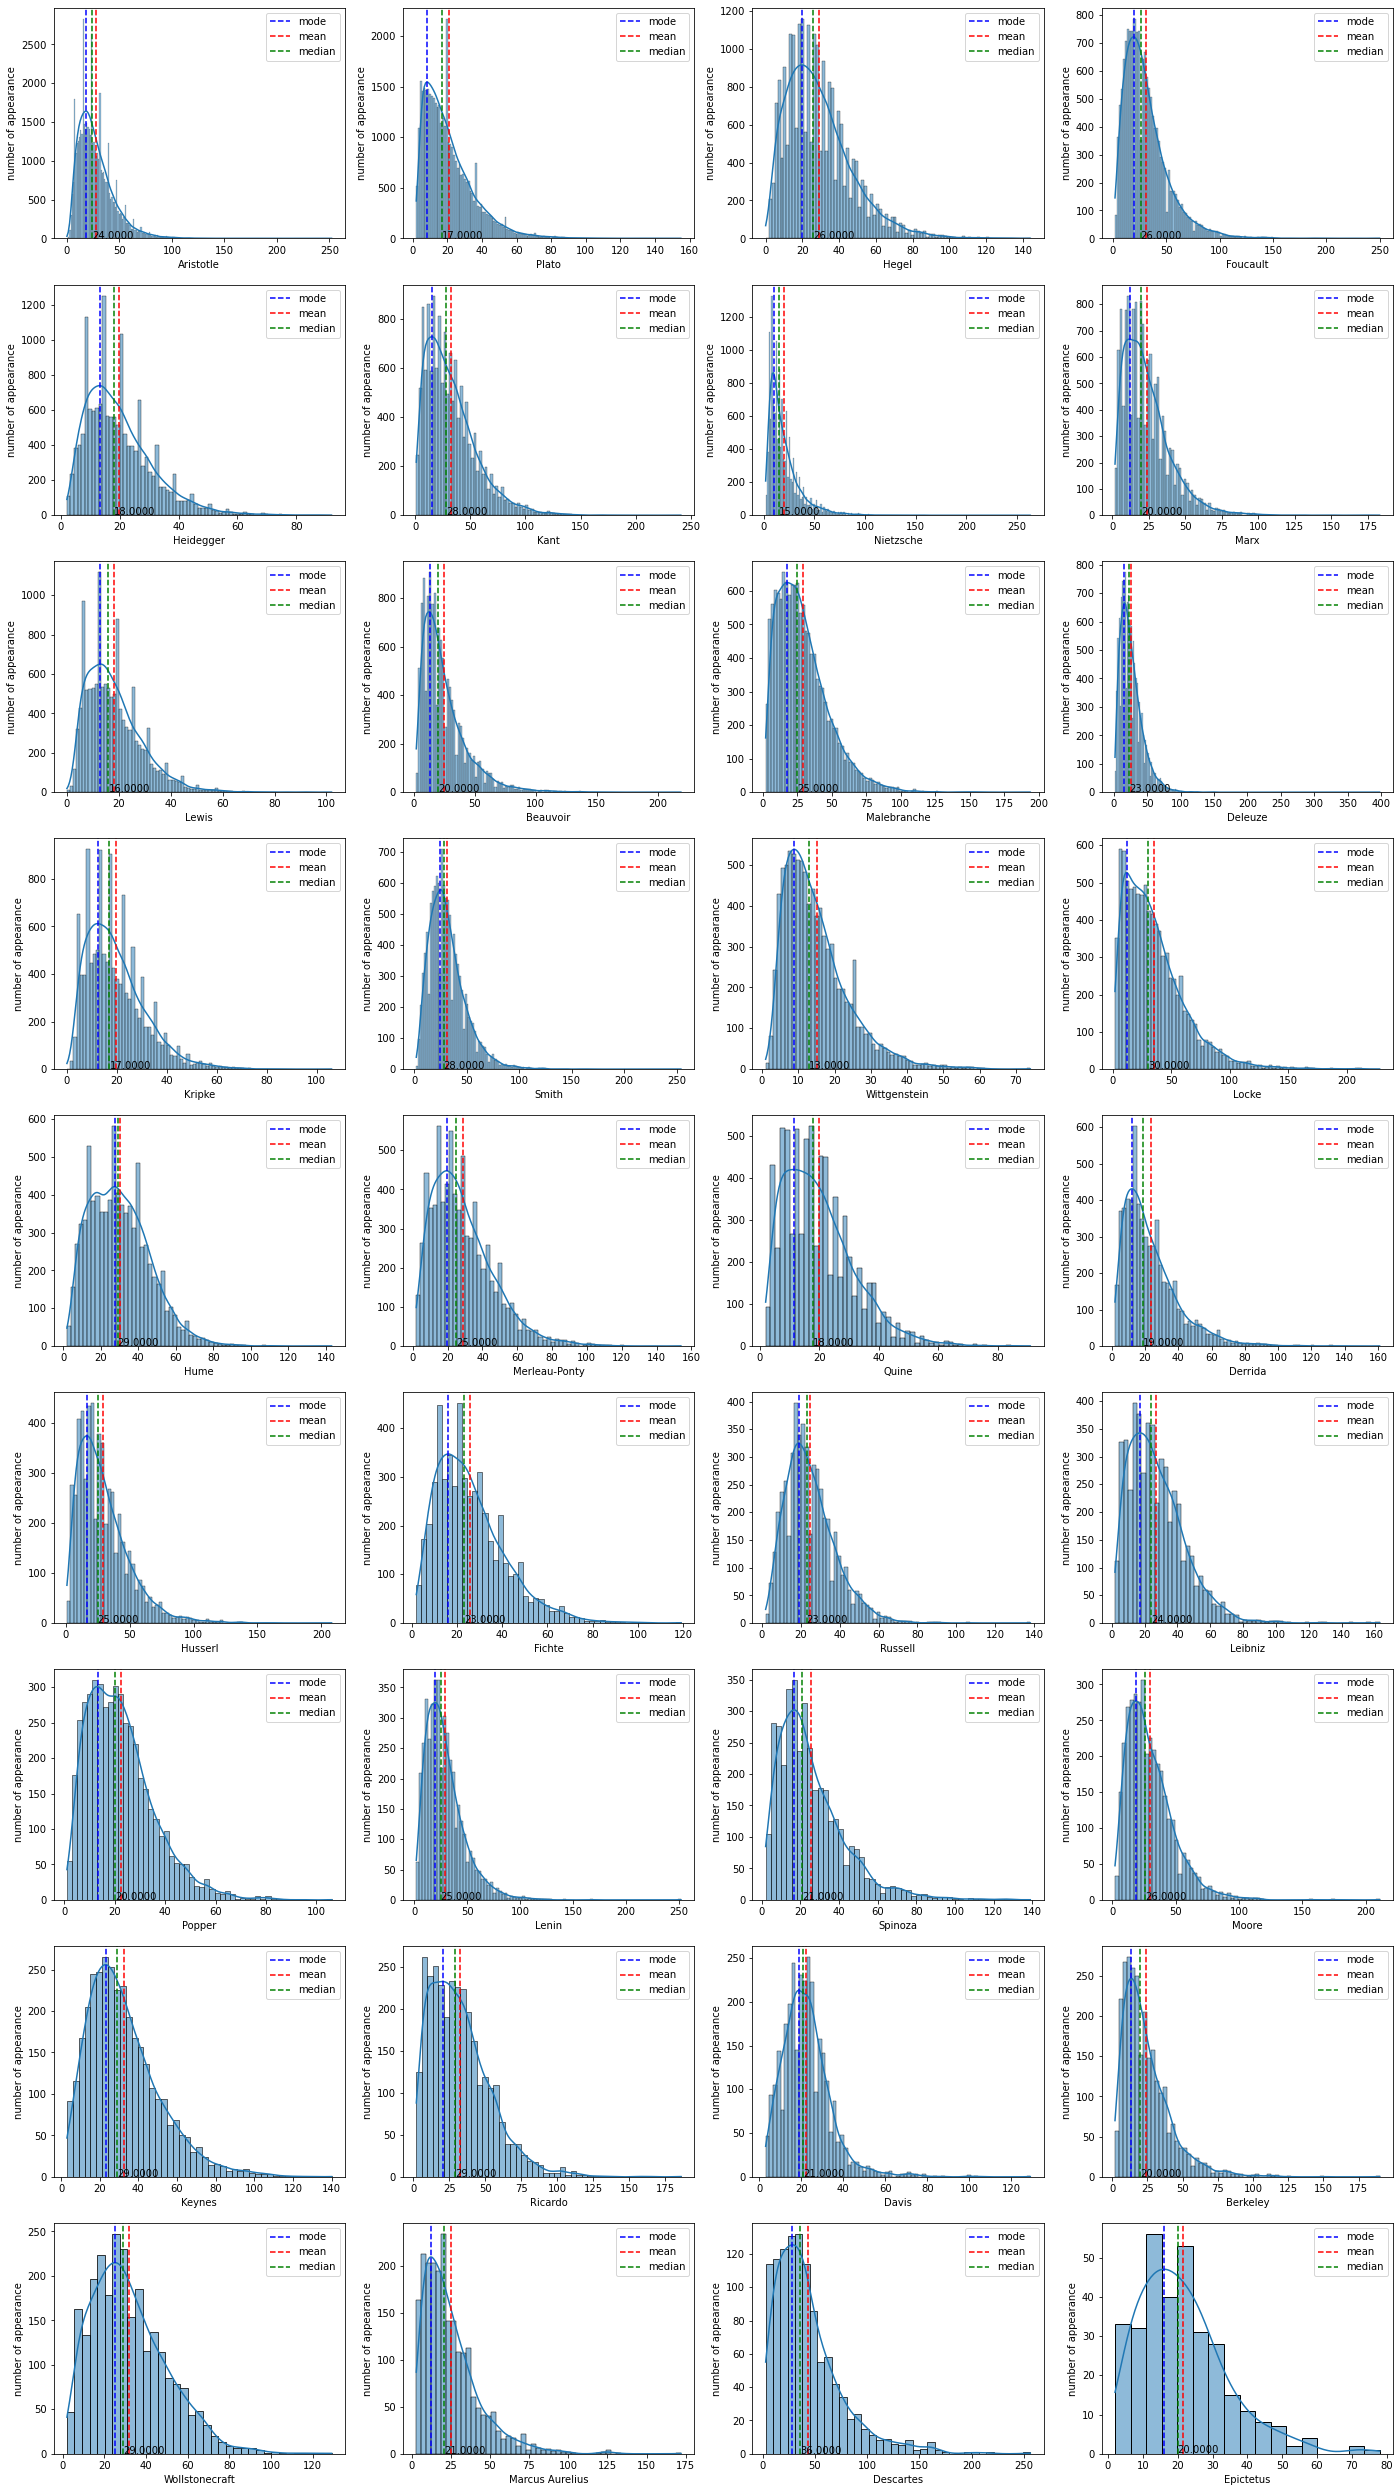

In [10]:
list_authors = df["author"].value_counts().index.tolist()

def make_histplot(stat, x_label, y_label, ax):
    # Draw the histogram and fit a density plot.
    sns.histplot(x=df.loc[df["author"]==author].num_of_tokens, kde=True, ax=ax)
    x=df.loc[df["author"]==author].num_of_tokens
    # get the y-coordinates of the points of the density curve.
    dens_list = ax.get_lines()[0].get_data()[1]

    # find the maximum y-coordinates of the density curve.
    max_dens_index = dens_list.argmax()

    # find the mode of the density plot.
    mode_x = ax.get_lines()[0].get_data()[0][max_dens_index]
    
    # draw a vertical line at the mode of the histogram.
    ax.axvline(mode_x, label='mode', color='blue', linestyle='dashed', linewidth=1.5)
    
    
    # draw a vertical line at the mean of the histogram.
    ax.axvline(x.mean(), label='mean',linestyle='dashed', color='red', linewidth=1.5)
    

    # draw a vertical line at the median of the histogram.
    ax.axvline(x.median(), label='median',linestyle='dashed', color='green', linewidth=1.5)
    ax.text(x.median(), 0.16, '{:.4f}'.format(x.median()))

    ax.legend()
    # Plot formatting
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

num_subplots = len(list_authors)
ncols = 4

nrows = 9
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols * 6, nrows * 5))
#colors = plt.cm.tab10.colors
for ax, author in zip(np.ravel(axes), list_authors):
    make_histplot(author, author, 'number of appearance', ax)
#for ax in np.ravel(axes)[num_subplots:]:  # remove possible empty subplots at the end
    #ax.remove()
plt.show()

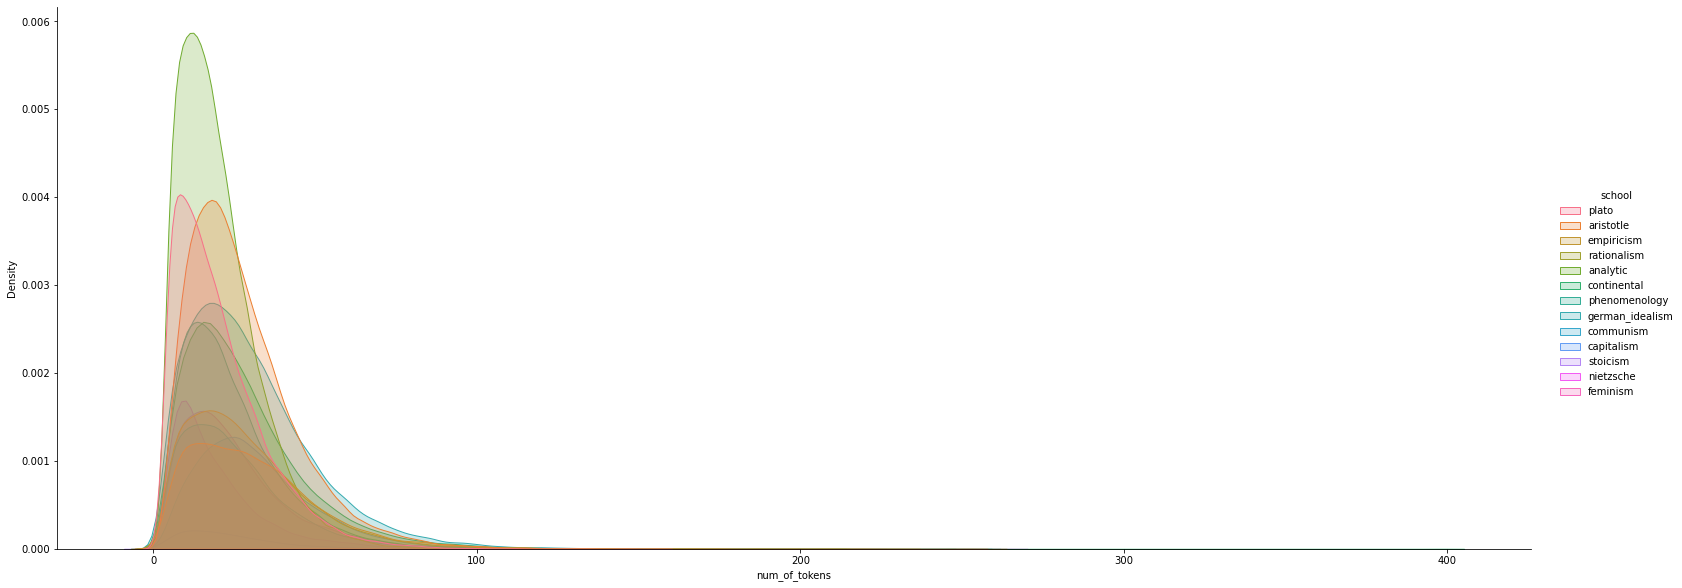

In [11]:
sns.displot(df,x="num_of_tokens",hue="school",kind="kde",fill=True, height=8.27, aspect=21.7/8.27)

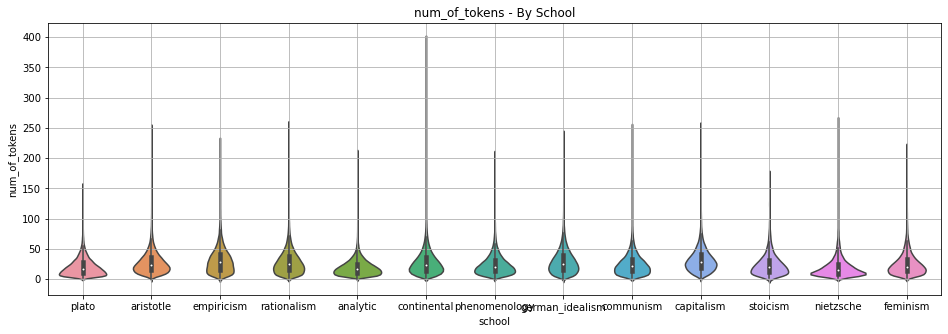

In [12]:
# plot sentence length split by school
plt.figure(figsize=(16,5))
sns.violinplot(x='school', y='num_of_tokens', data=df)
plt.title('num_of_tokens - By School')
plt.grid()

In [13]:
# input a list of common words

with open("C:/Users/shy/Dropbox/PC/Desktop/统计作业/5243/ads-spring2023-project1-Fredw1999/data/english.txt", "r",encoding='utf-8') as f:
    words = f.read() 
 
common_words=words.split("\n")

In [14]:
def create_notion(tokenized_txt):
    notions=[]
    a=0
    tokenized_txt=ast.literal_eval(tokenized_txt)
    for i in tokenized_txt:
        if i not in common_words:
            notions.append(i)
            a=a+1
    return(a,notions)
df["notions"]=df["tokenized_txt"].apply(create_notion)
df["num_of_notions"]=df["notions"].apply(lambda x :x[0])
df["notions_list"]=df["notions"].apply(lambda x :x[1])

Text(0.5, 1.0, 'Difficultness of reading according to use of uncommon words')

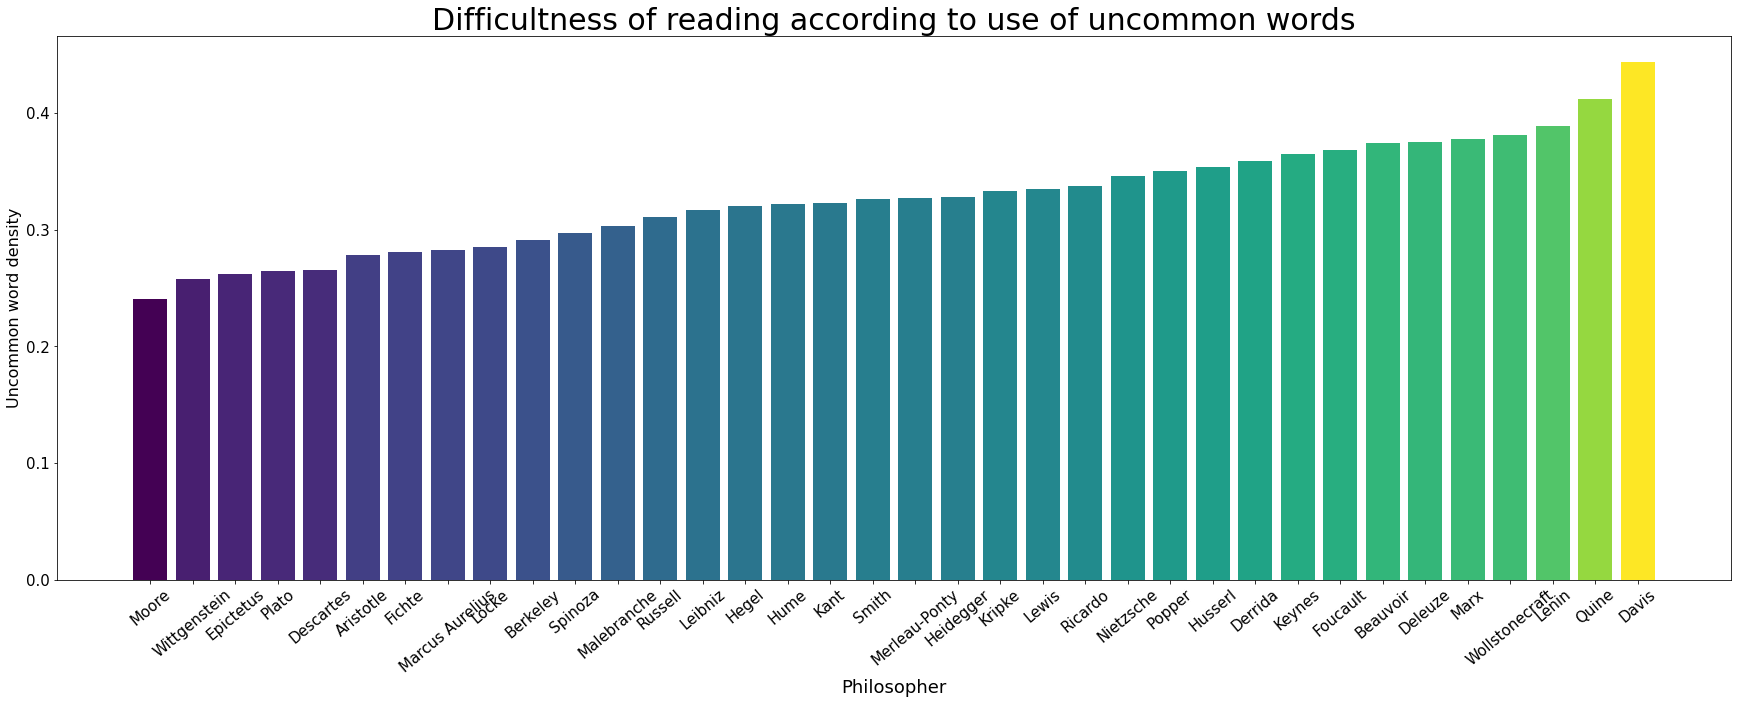

In [15]:
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

Uncommonness=(df.groupby("author").sum()["num_of_notions"]/df.groupby("author").sum()["num_of_tokens"]).sort_values()
fig,ax=plt.subplots(figsize=(30,10))
plt.bar(Uncommonness.index,Uncommonness.values,color=my_cmap(rescale(Uncommonness.values)))
ax.tick_params(labelsize=15)
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(40)
plt.xlabel('Philosopher', fontsize=18)
plt.ylabel('Uncommon word density', fontsize=16)
plt.title("Difficultness of reading according to use of uncommon words",fontsize=30)

Text(0.5, 1.0, 'Difficultness of reading according to use of uncommon words')

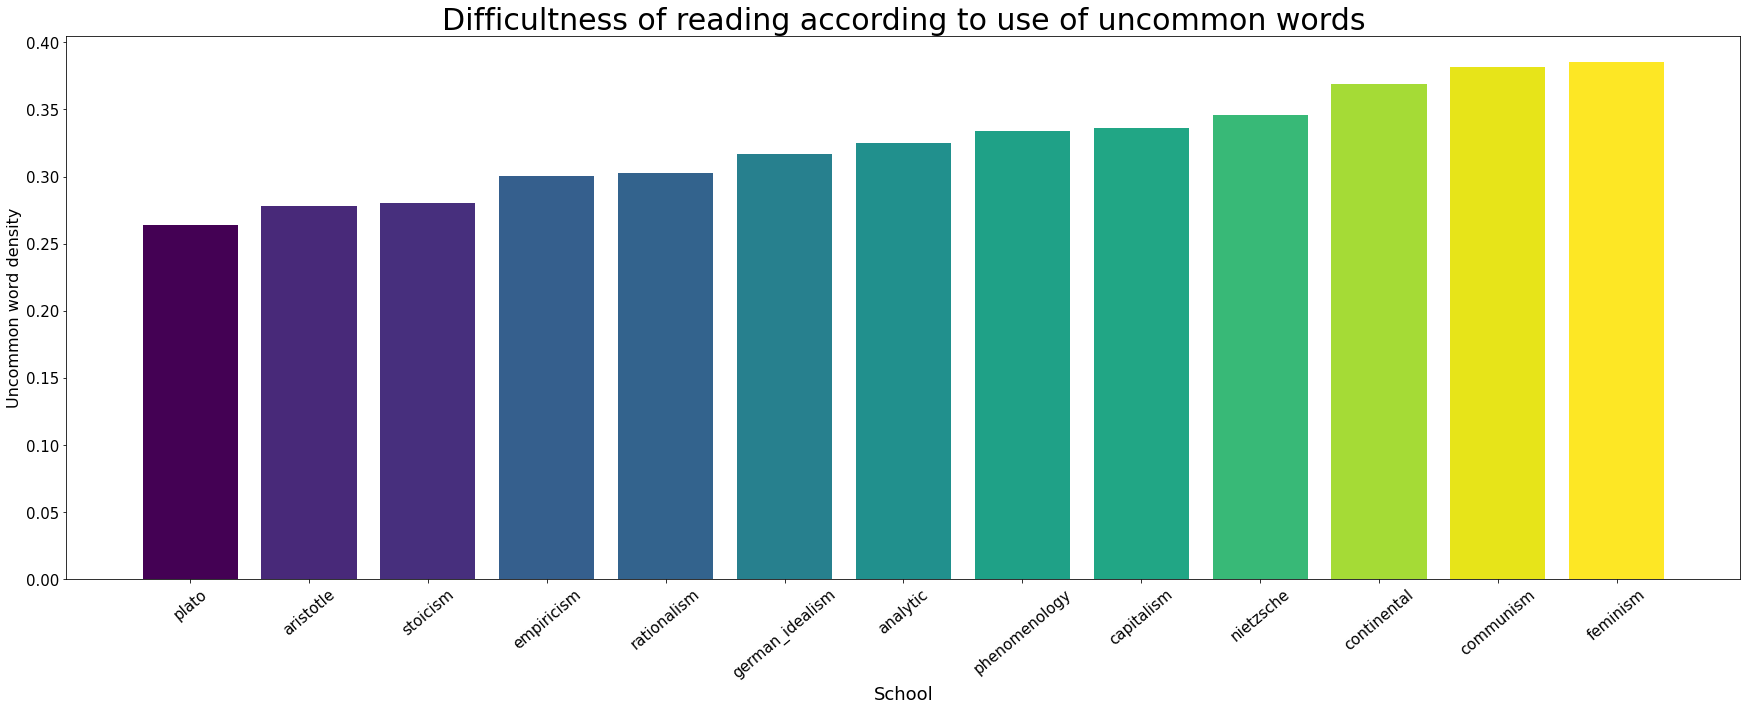

In [16]:
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

Uncommonness=(df.groupby("school").sum()["num_of_notions"]/df.groupby("school").sum()["num_of_tokens"]).sort_values()
fig,ax=plt.subplots(figsize=(30,10))
plt.bar(Uncommonness.index,Uncommonness.values,color=my_cmap(rescale(Uncommonness.values)))
ax.tick_params(labelsize=15)
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(40)
plt.xlabel('School', fontsize=18)
plt.ylabel('Uncommon word density', fontsize=16)
plt.title("Difficultness of reading according to use of uncommon words",fontsize=30)

School =  ANALYTIC :


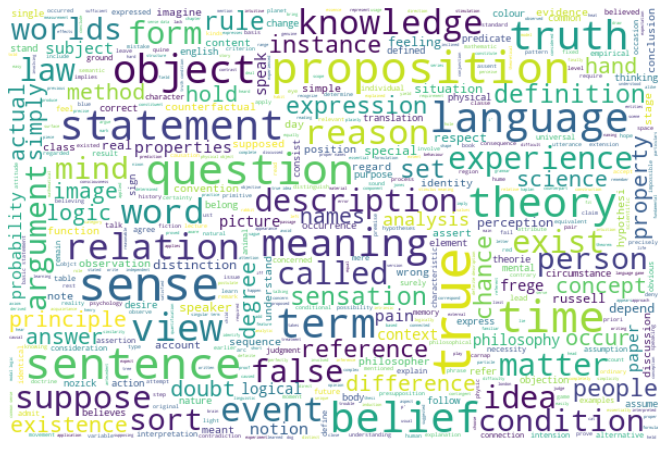

School =  ARISTOTLE :


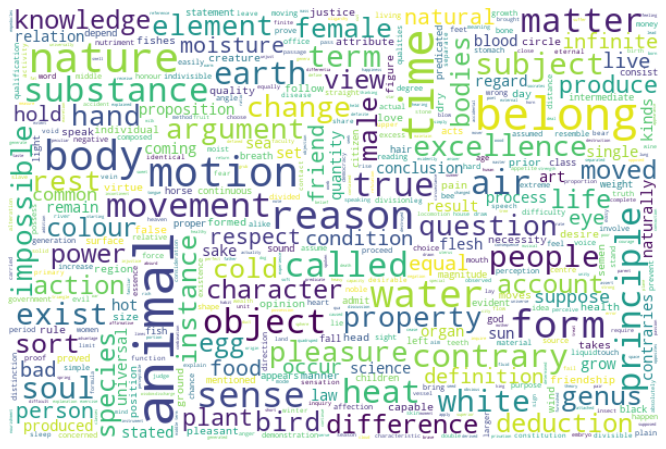

School =  GERMAN_IDEALISM :


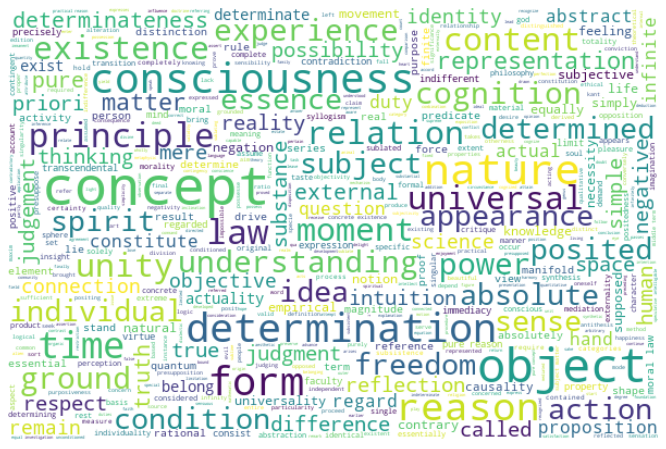

School =  PLATO :


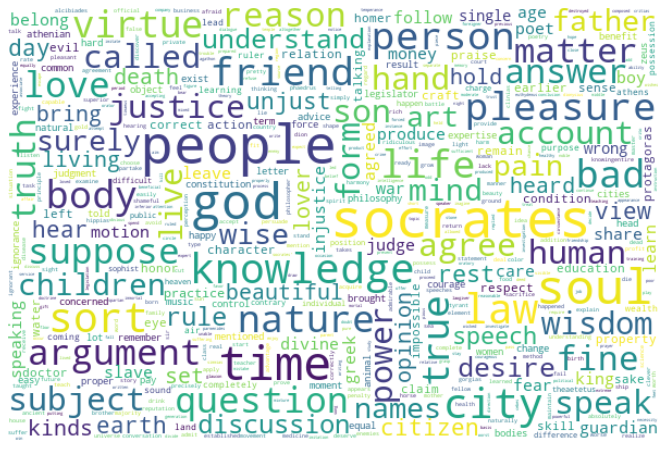

School =  CONTINENTAL :


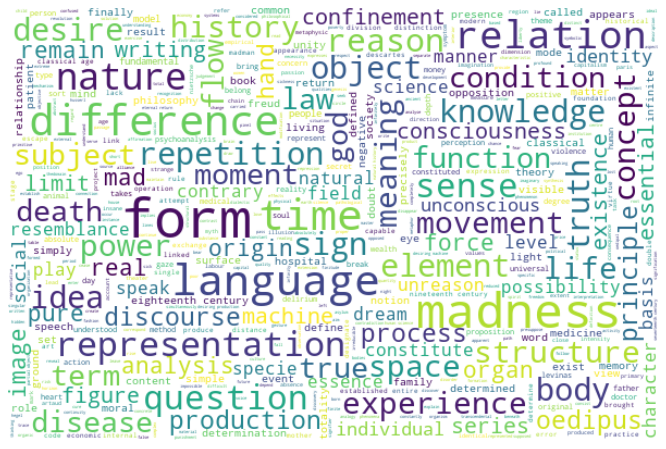

School =  PHENOMENOLOGY :


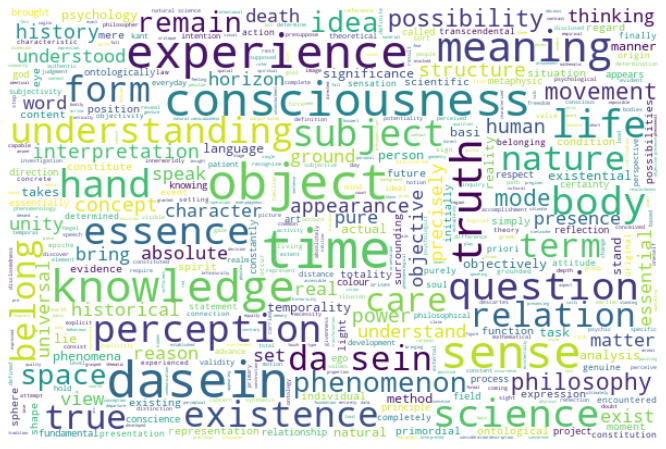

School =  RATIONALISM :


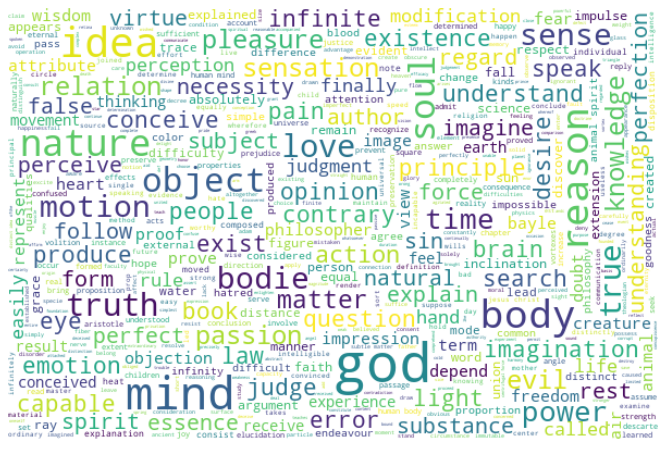

School =  EMPIRICISM :


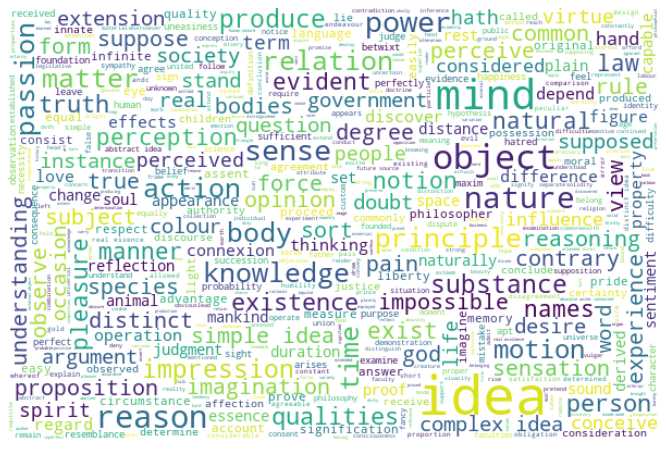

School =  FEMINISM :


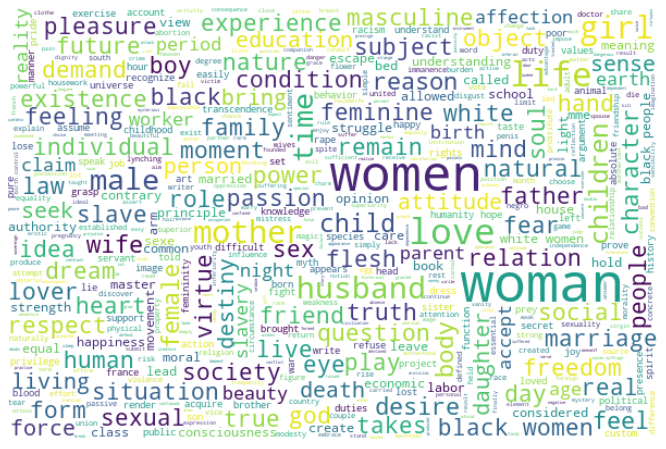

School =  CAPITALISM :


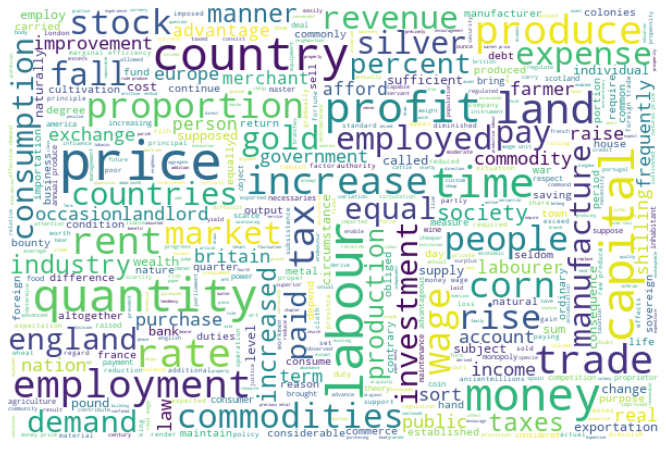

School =  COMMUNISM :


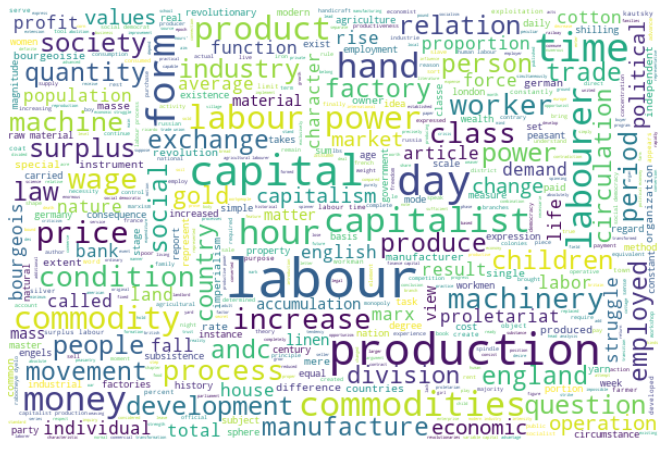

School =  NIETZSCHE :


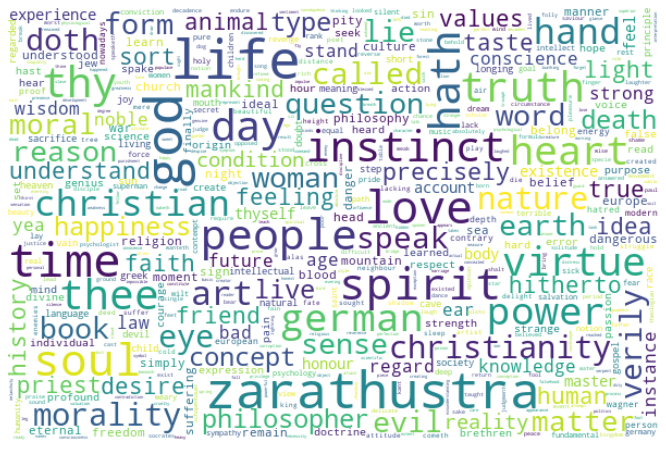

School =  STOICISM :


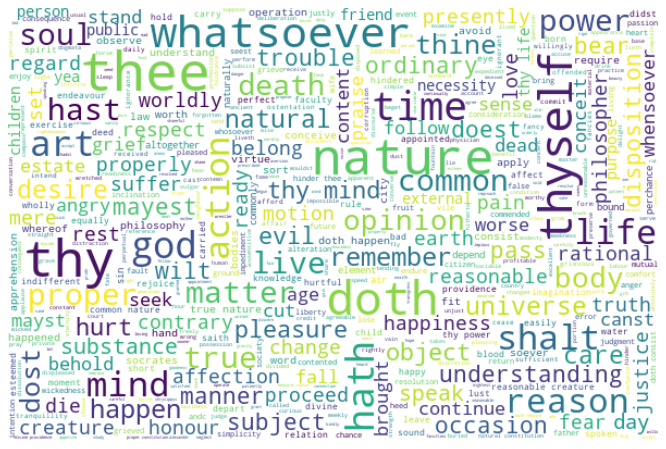

Elapsed time:  31.19


In [17]:

t1 = time.time()
stopwords=set(common_words)
schools = df["school"].value_counts().index.tolist()
for sc in schools:
    df_temp = df[df.school==sc]
    
    print('School = ', sc.upper(), ':')
    
    # render wordcloud
    text = " ".join(txt for txt in df_temp.sentence_lowered)
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                          width = 600, height = 400,
                          background_color="white").generate(text)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
t2 = time.time()
print('Elapsed time: ', np.round(t2-t1,2))